In [12]:
from map_generator import MapGenerator
import matplotlib.pyplot as plt
import numpy as np
import time
from Planners.abc.abc_problem import ABCProblem
from Planners.pso.pso_problem import PSOProblem
from Planners.gwo.gwo_problem import GWOProblem
from Planners.util.planner_base import PlannerBase
from Planners.helper import linear_interpolation
from IPython.display import display, clear_output

In [3]:
map_gen = MapGenerator('map_params/map_012_params.yaml')

(2000, 2000)


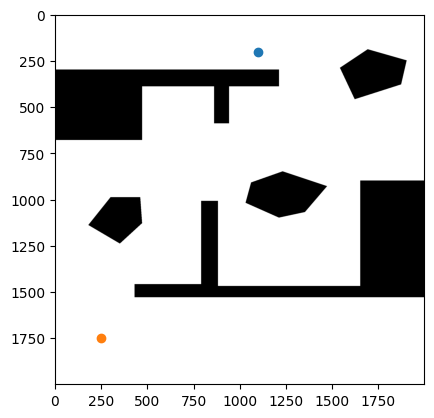

In [4]:
curr_map = map_gen.map.get_map()
start = np.array([1100, 200]).astype(np.int32)
end = np.array([250, 1750]).astype(np.int32)
plt.imshow(curr_map, cmap='gray')
plt.scatter([start[0]], [start[1]])
plt.scatter([end[0]], [end[1]])
print(curr_map.shape)
plt.show()

In [26]:
def get_callback(appending_list):
    def callback(iteration, particle):
        print('Completed iteration', iteration+1)
        appending_list.append(particle)
    return callback

In [31]:
planner_solution = {
    'ABC': list(),
    'GWO': list(),
    'PSO': list()
}

planner_params = {
    'ABC Optimizer': {
        'optimizer': ABCProblem,
        'optimizer_params': {
            'iteration_number': 20,
            'bees': 10,
            'points': 4,
            'iteration_callback': get_callback(planner_solution['ABC']),
            'high_step_prob': 0.3
        },
        'map': curr_map,
        'cost_func_wt': (2, 1)
    },
    'GWO Optimizer': {
        'optimizer': GWOProblem,
        'optimizer_params': {
            'iteration_number': 20,
            'wolves': 20,
            'points': 4,
            'iteration_callback': get_callback(planner_solution['GWO'])
        },
        'map': curr_map,
        'cost_func_wt': (2, 1)
    },
    'PSO Optimizer': {
        'optimizer': PSOProblem,
        'optimizer_params': {
            'iteration_number': 20,
            'particles': 20,
            'points': 4,
            'iteration_callback': get_callback(planner_solution['PSO']),
            'weight': 0.5,
            'c_1': 1.5,
            'c_2': 1.5
        },
        'map': curr_map,
        'cost_func_wt': (2, 1)
    }
}

In [32]:
time_taken = dict()
for planner_name in planner_params:
    print('='*40)
    print('Entering', planner_name)
    print('='*40)
    start_time = time.time()
    planner = PlannerBase(**planner_params[planner_name])
    path = planner.get_path(start, end)
    end_time = time.time()
    elapsed_time = end_time - start_time
    time_taken[planner_name] = elapsed_time

Entering ABC Optimizer
Completed iteration 1
Completed iteration 2
Completed iteration 3
Completed iteration 4
Completed iteration 5
Completed iteration 6
Completed iteration 7
Completed iteration 8
Completed iteration 9
Completed iteration 10
Completed iteration 11
Completed iteration 12
Completed iteration 13
Completed iteration 14
Completed iteration 15
Completed iteration 16
Completed iteration 17
Completed iteration 18
Completed iteration 19
Completed iteration 20
Entering GWO Optimizer
Completed iteration 1
Completed iteration 2
Completed iteration 3
Completed iteration 4
Completed iteration 5
Completed iteration 6
Completed iteration 7
Completed iteration 8
Completed iteration 9
Completed iteration 10
Completed iteration 11
Completed iteration 12
Completed iteration 13
Completed iteration 14
Completed iteration 15
Completed iteration 16
Completed iteration 17
Completed iteration 18
Completed iteration 19
Completed iteration 20
Entering PSO Optimizer
Completed iteration 1
Complet

In [29]:
time_taken

{'ABC Optimizer': 50.067821741104126,
 'GWO Optimizer': 15.899415254592896,
 'PSO Optimizer': 22.352409839630127}

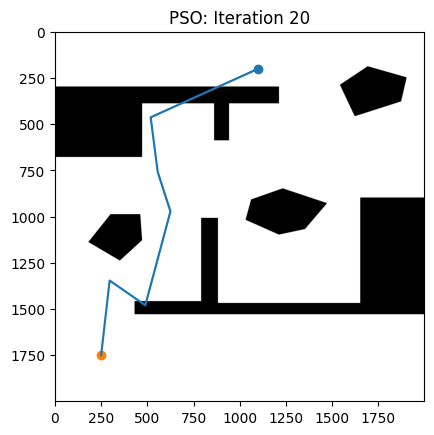

In [30]:
for curr_optimizer in planner_solution:
    itr = 1
    for sol in planner_solution[curr_optimizer]:
        points = sol.position.reshape(-1, 2)
        points = (points * (np.array(curr_map.shape[::-1]) - 1)).astype(np.int32)
        path = linear_interpolation(start, end, points)
        fig = plt.figure()
        plt.title('%s: Iteration %d' % (curr_optimizer, itr))
        plt.imshow(curr_map, cmap='gray')
        plt.scatter([start[0]], [start[1]])
        plt.scatter([end[0]], [end[1]])
        plt.plot(path[:, 0], path[:, 1])
        display(fig)
        clear_output(wait = True)
        plt.pause(0.01)
        clear_output(wait = True)
        itr += 1